
SVM (RBF) Statistics:
Accuracy : 96.67%
Precision: 96.97%
Recall   : 96.67%
F1-Score : 96.66%


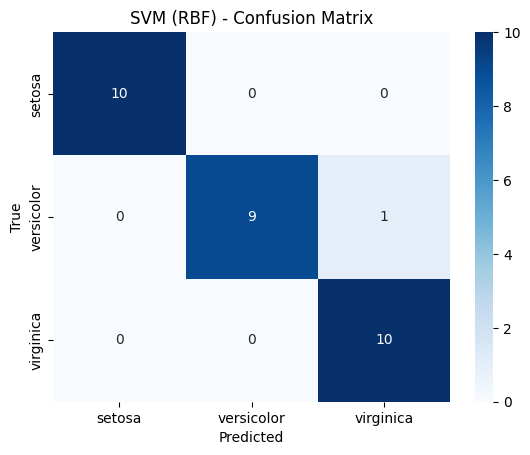

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Logistic Regression Statistics:
Accuracy : 93.33%
Precision: 93.33%
Recall   : 93.33%
F1-Score : 93.33%


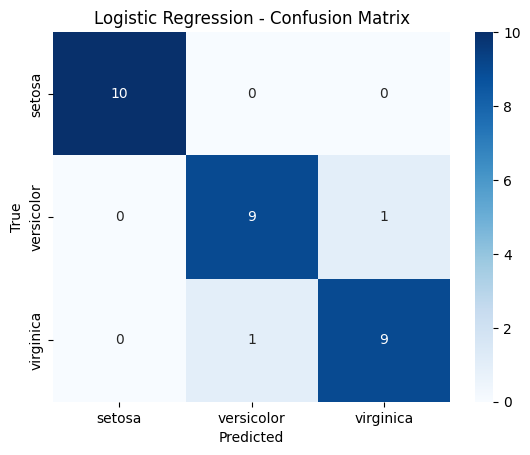

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNN (k=5) Statistics:
Accuracy : 93.33%
Precision: 94.44%
Recall   : 93.33%
F1-Score : 93.27%


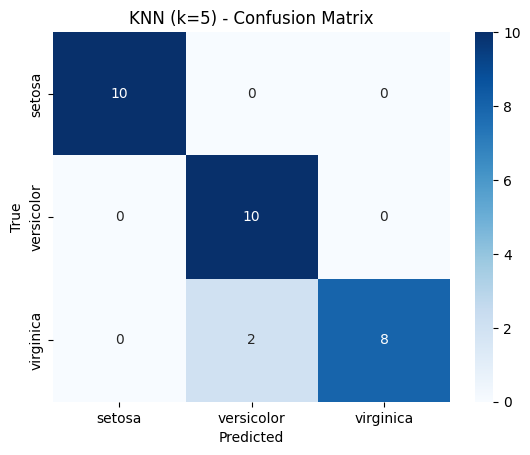

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Decision Tree Statistics:
Accuracy : 93.33%
Precision: 93.33%
Recall   : 93.33%
F1-Score : 93.33%


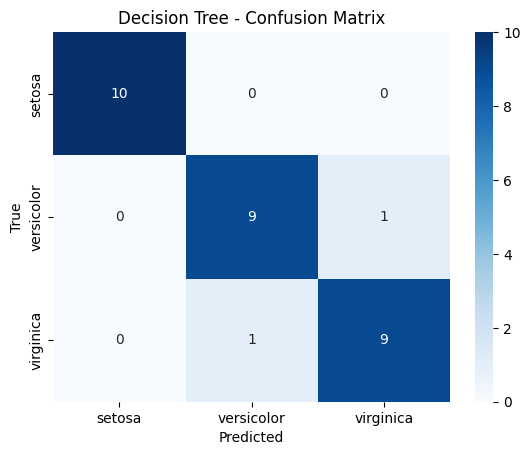

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define classifiers
classifiers = {
    "SVM (RBF)": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Compare classifiers
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\n{name} Statistics:")
    print(f"Accuracy : {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall   : {rec*100:.2f}%")
    print(f"F1-Score : {f1*100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Detailed Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
